In [76]:
import pandas as pd
import numpy as np
import datetime
import requests
import io

In [17]:
df = pd.read_csv('turnstile_180922.csv')

current_d = datetime.datetime(2018, 9, 22)

In [15]:
#this is for more data
# for i in range(0,1):
#     #modify the .csv string
#     new_date = current_d - datetime.timedelta(days = 7*(i+1))
#     url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + new_date.strftime('%y%m%d') + '.txt'
#     #modify the df name
#     dft = pd.read_csv(url)
#     dfs = [df, dft]
#     pd.concat(dfs)

In [18]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  6759219   
1  REGULAR  6759234   
2  REGULAR  6759251   
3  REGULAR  6759330   
4  REGULAR  6759538   

   EXITS                                                                 
0                                            2291425                     
1                                            2291429                     
2                                            2291453                     
3                                            2291532                     
4                                            2291574

In [19]:
df.rename(columns=lambda x: x.strip(),inplace='True')

df.rename(columns={'ENTRIES': 'CUMULATIVE_ENTRIES', 'EXITS': 'CUMULATIVE_EXITS'}, inplace=True)

df.describe()


CUMULATIVE_ENTRIES  CUMULATIVE_EXITS
count        1.991020e+05      1.991020e+05
mean         3.938775e+07      3.213346e+07
std          2.042776e+08      1.889398e+08
min          0.000000e+00      0.000000e+00
25%          4.770375e+05      2.237652e+05
50%          2.436008e+06      1.369190e+06
75%          6.906623e+06      4.747636e+06
max          2.129739e+09      2.062549e+09

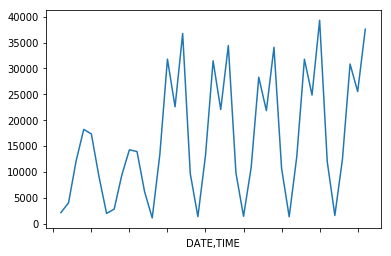

In [20]:
df3 = df[(df['STATION'] == '59 ST')].copy()

#Remove times which are not 0h,4h,8h,12h,16h or 20h
df3 = df3[(df3['TIME'] == '00:00:00') | \
          (df3['TIME'] == '04:00:00') | \
          (df3['TIME'] == '08:00:00') | \
          (df3['TIME'] == '12:00:00') | \
          (df3['TIME'] == '16:00:00') | \
          (df3['TIME'] == '20:00:00')].copy()



df3 = df3.groupby(['DATE','TIME']).sum()

# Calculating net entries, net exits and net traffic
df3['NET_ENTRIES'] = df3['CUMULATIVE_ENTRIES'].diff()

df3['NET_EXITS'] = df3['CUMULATIVE_EXITS'].diff()

df3['NET_TRAFFIC'] = df3['NET_EXITS'] + df3['NET_ENTRIES']



# Plot of all SCPs summed for one station
df3.NET_TRAFFIC.plot()


In [21]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  09/15/2018  16:00:00   

      DESC  CUMULATIVE_ENTRIES  CUMULATIVE_EXITS  
0  REGULAR             6759219           2291425  
1  REGULAR             6759234           2291429  
2  REGULAR             6759251           2291453  
3  REGULAR             6759330           2291532  
4  REGULAR             6759538           2291574

In [50]:
idx = pd.IndexSlice

In [61]:
idx[4:3]

lst[3:4]

slice(4, 3, None)

In [62]:
[[3, 4], 1, 2, 3][0][1]

4

In [93]:
date = '09/15/2018'
time = '08:00:00'

df4 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()

df4 = df4.groupby(['STATION','DATE','TIME']).sum()

df4['NET_ENTRIES'] = df4['CUMULATIVE_ENTRIES'].diff()

df4['NET_EXITS'] = df4['CUMULATIVE_EXITS'].diff()

df4['NET_TRAFFIC'] = df4['NET_EXITS'] + df4['NET_ENTRIES']

#df4 = df4[not((df4['TIME'] == '00:00:00') & (df4['DATE'] == '09/15/2018'))]

df4.loc[(idx[:], '09/15/2018', '00:00:00'), :] = np.nan

df4.dropna(inplace=True)

df5 = df4.loc[(idx[:], '09/15/2018', '08:00:00'), :]

df5

CUMULATIVE_ENTRIES  CUMULATIVE_EXITS  \
STATION         DATE       TIME                                             
1 AV            09/15/2018 08:00:00        3.039309e+09      1.627419e+09   
103 ST-CORONA   09/15/2018 08:00:00        6.704448e+07      6.855824e+07   
104 ST          09/15/2018 08:00:00        4.842498e+09      3.518785e+09   
110 ST          09/15/2018 08:00:00        3.553427e+07      3.420074e+07   
111 ST          09/15/2018 08:00:00        6.706416e+07      4.553589e+07   
121 ST          09/15/2018 08:00:00        9.167943e+06      7.176135e+06   
125 ST          09/15/2018 08:00:00        1.159091e+09      7.582491e+08   
135 ST          09/15/2018 08:00:00        4.444490e+07      1.667570e+07   
138/GRAND CONC  09/15/2018 08:00:00        9.989132e+08      9.644458e+08   
14 ST           09/15/2018 08:00:00        2.193549e+09      2.042408e+09   
145 ST          09/15/2018 08:00:00        9.290073e+08      1.975932e+09   
149/GRAND CONC  09/15/2018 08:00:00        1.361034e+08      9.255200e+05   
167 ST          09/15/2018 08:00:00        3.601107e+07      2.798012e+07   
168 ST          09/15/2018 08:00:00        1.525920e+08      7.060931e+07   
169 ST          09/15/2018 08:00:00        2.780571e+07      1.789372e+07   
170 ST          09/15/2018 08:00:00        8.470566e+08      5.600342e+08   
175 ST          09/15/2018 08:00:00        3.817536e+08      3.087676e+08   
176 ST          09/15/2018 08:00:00        1.557042e+07      9.934747e+06   
18 AV           09/15/2018 08:00:00        1.836524e+09      8.419779e+08   
18 ST           09/15/2018 08:00:00        2.270655e+08      7.489510e+08   
181 ST          09/15/2018 08:00:00        3.728229e+07      4.092586e+07   
182-183 STS     09/15/2018 08:00:00        5.874963e+07      3.056305e+07   
183 ST          09/15/2018 08:00:00        4.586433e+09      2.739452e+09   
190 ST          09/15/2018 08:00:00        1.453579e+09      1.847582e+09   
191 ST          09/15/2018 08:00:00        1.369124e+07      1.725992e+07   
2 AV            09/15/2018 08:00:00        1.307190e+08      8.972047e+07   
20 AV           09/15/2018 08:00:00        1.188325e+07      6.369634e+06   
207 ST          09/15/2018 08:00:00        1.586117e+08      7.546731e+06   
21 ST-QNSBRIDGE 09/15/2018 08:00:00        4.173446e+07      3.702217e+07   
215 ST          09/15/2018 08:00:00        7.212384e+06      1.704458e+08   
...                                                 ...               ...   
PRESIDENT ST    09/15/2018 08:00:00        1.551152e+07      1.746624e+07   
PRINCE ST       09/15/2018 08:00:00        6.847738e+07      4.279666e+07   
PROSPECT AV     09/15/2018 08:00:00        3.192544e+07      3.076472e+07   
PROSPECT PARK   09/15/2018 08:00:00        1.610556e+09      8.257034e+08   
QUEENSBORO PLZ  09/15/2018 08:00:00        2.616468e+07      7.847505e+06   
RECTOR ST       09/15/2018 08:00:00        1.567340e+08      3.574239e+07   
ROCKAWAY AV     09/15/2018 08:00:00        1.853811e+07      1.440144e+07   
ROOSEVELT ISLND 09/15/2018 08:00:00        1.372578e+07      1.180546e+07   
SARATOGA AV     09/15/2018 08:00:00        2.859390e+07      2.204208e+07   
SMITH-9 ST      09/15/2018 08:00:00        1.116344e+07      9.885721e+06   
SPRING ST       09/15/2018 08:00:00        5.114183e+08      1.239355e+08   
ST LAWRENCE AV  09/15/2018 08:00:00        1.431143e+07      9.204406e+06   
ST. GEORGE      09/15/2018 08:00:00        1.204493e+08      1.003500e+05   
STEINWAY ST     09/15/2018 08:00:00        5.931856e+07      4.398890e+07   
STERLING ST     09/15/2018 08:00:00        1.629541e+07      8.755129e+06   
SUTPHIN-ARCHER  09/15/2018 08:00:00        1.644963e+08      8.489534e+07   
SUTTER AV-RUTLD 09/15/2018 08:00:00        1.740096e+07      1.391814e+07   
TIMES SQ-42 ST  09/15/2018 08:00:00        5.846143e+09      4.561739e+09   
UNION ST        09/15/2018 08:00:00        2.512680e+07      2.523937e+07   
V.CORTLANDT PK  09/15/2018 08:00: